# Pymaceuticals Inc.
---
 

## Analysis


#### *Generate Working DataFrame*

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete=pd.DataFrame(pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID'))

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
print(f"Number of entries= {len(mouse_study_complete)}")
num_mice=mouse_study_complete['Mouse ID'].nunique()
print(f"Number of unique mice =  {num_mice}")

Number of entries= 1893
Number of unique mice =  249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id_dupes=mouse_study_complete[mouse_study_complete.duplicated(subset=["Mouse ID","Timepoint"])]['Mouse ID'].unique()
mouse_id_dupes

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data=mouse_study_complete[mouse_study_complete['Mouse ID'].isin(mouse_id_dupes)]
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mouse_data=mouse_study_complete[mouse_study_complete['Mouse ID'].isin(mouse_id_dupes)==False]
unique_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
unique_mice=unique_mouse_data['Mouse ID'].nunique()
print(f"Number of unique mice from cleaned dataset = {unique_mice}")

Number of unique mice from cleaned dataset = 248


## Summary Statistics

In [9]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_vol=unique_mouse_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_tumor_vol=unique_mouse_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
var_tumor_vol=unique_mouse_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
stdev_tumor_vol=unique_mouse_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem_tumor_vol=unique_mouse_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_results=pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_vol,
    "Median Tumor Volume":median_tumor_vol,
    "Tumor Volume Variance":var_tumor_vol,
    "Tumor Volume Std. Dev.":stdev_tumor_vol,
    "Tumor Volume Std. Err.":sem_tumor_vol
})

regimen_results


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

regimen_results_agg=pd.DataFrame(
    unique_mouse_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':["mean","median","var","std","sem"]})
)
regimen_results_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

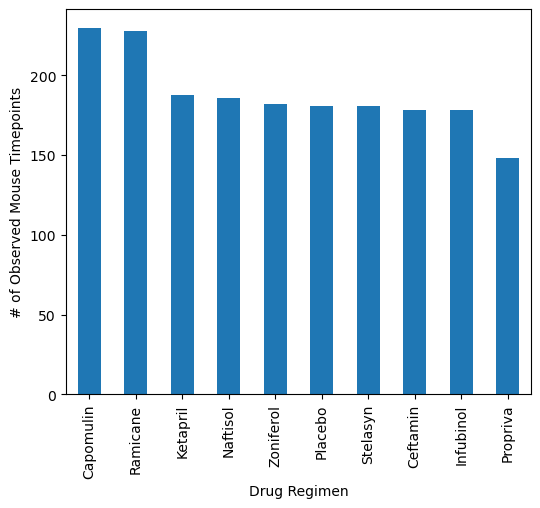

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_timepoints = unique_mouse_data.groupby(['Drug Regimen']).count()['Timepoint']
regimen_timepoints=regimen_timepoints.sort_values(ascending=[False])

regimen_timepoints_plot=regimen_timepoints.plot(
    kind="bar",
    figsize=(6,5),
    xlabel="Drug Regimen",
    ylabel="# of Observed Mouse Timepoints"
    )
plt.show()

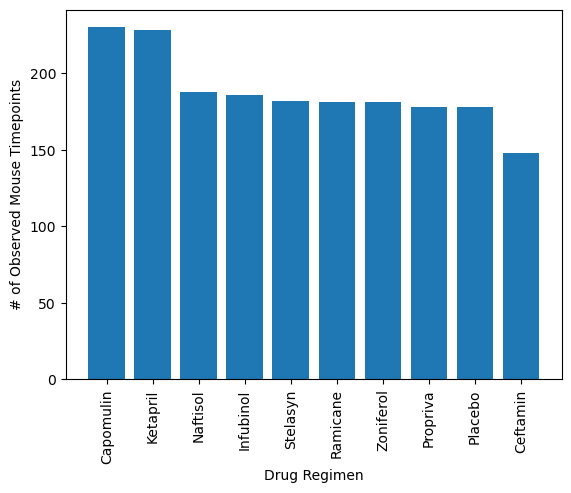

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_labels=unique_mouse_data['Drug Regimen'].unique()
y_data=regimen_timepoints

plt.bar(np.arange(len(x_labels)),y_data,align='center')
plt.xticks(np.arange(len(x_labels)),x_labels,rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

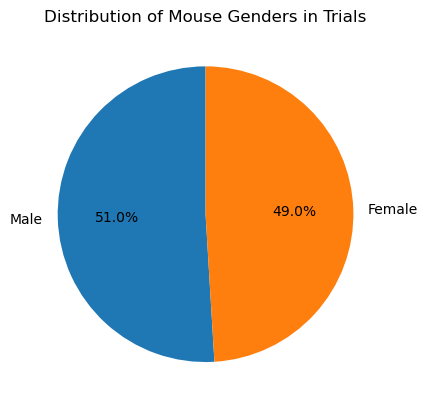

In [54]:
#Find all unique entries within 'Sex' column
mouse_sex=unique_mouse_data['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distrib=mouse_sex.plot(
    kind='pie',
    autopct="%.1f%%",
    startangle=90
    )


#Since the plot is rotated- to view the near equal split better, y-axis title must be removed, and generate a plot title
gender_distrib.set_ylabel('')
gender_distrib.set_title("Distribution of Mouse Genders in Trials")
plt.show()



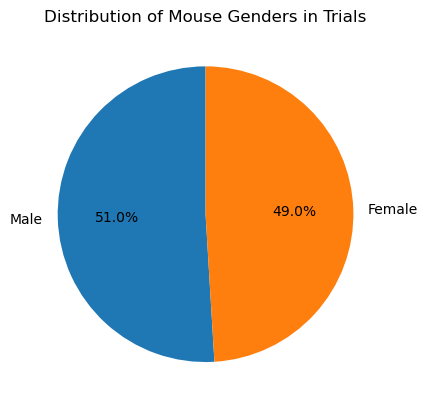

In [56]:
# Need to sort coumn due to labels/data not ligning up correctly when data layout was constructed

pie_labels = unique_mouse_data.sort_values(by=['Sex'], ascending=[False])['Sex'].unique()

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex,
        labels = pie_labels,
        autopct="%1.1f%%",
        startangle=90
        )
plt.title('Distribution of Mouse Genders in Trials')
plt.show()

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
trial_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse

recent_chron_list=unique_mouse_data.groupby(['Mouse ID']).max()['Timepoint'].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
recent_chron_unique_mouse=pd.merge(recent_chron_list,unique_mouse_data, on=['Mouse ID', "Timepoint"],how='left')
recent_chron_unique_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [80]:
# Put treatments into a list for for loop (and later for plot labels)

    # Already did this in the cell directly above

# Create empty list to fill with tumor vol data (for plotting)

treatment_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in trial_regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_size=recent_chron_unique_mouse[recent_chron_unique_mouse['Drug Regimen'] == treatment]["Tumor Volume (mm3)"]
    
    # add subset 
    treatment_list.append(tumor_size)

    # Determine outliers using upper and lower bounds
    # Define quartile sizes
    quartiles = tumor_size.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    # Define dimentions
    iqr = upperq-lowerq
    low_bound = lowerq-(1.5*iqr)
    upp_bound = upperq+(1.5*iqr)

    # define outlier locations with "or" 
    outliers = tumor_size[(tumor_size<low_bound) | (tumor_size>upp_bound)]

    #check if everything looks good
    print(f"{treatment} has {list(outliers)} as a potential outliers")




Capomulin has [] as a potential outliers
Ramicane has [] as a potential outliers
Infubinol has [36.3213458] as a potential outliers
Ceftamin has [] as a potential outliers


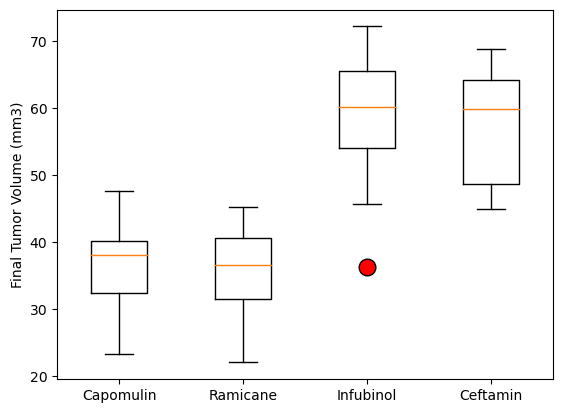

In [86]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(treatment_list,
            labels= trial_regimen,
            flierprops=
                {"markerfacecolor":"red",
                 "markersize":12
                 } 
            )
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

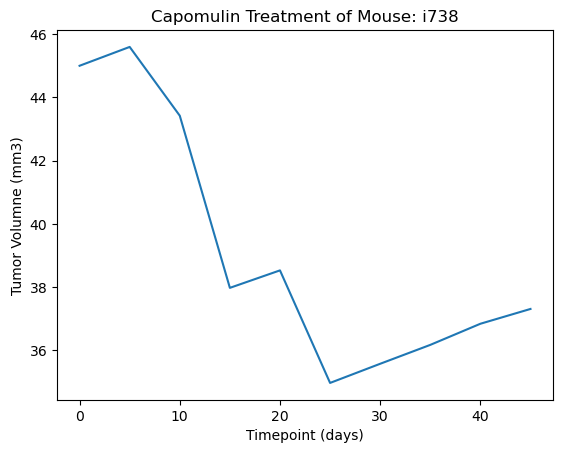

In [122]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose random mouse

import random

treatment_comparo=pd.Series(["Capomulin"])
treatment_table=unique_mouse_data[unique_mouse_data["Drug Regimen"] == treatment_comparo[0]]
rand_mouse=random.choice(treatment_table['Mouse ID'].unique())
rand_mouse_data=treatment_table[treatment_table['Mouse ID'] == rand_mouse]

# Generate line plot

treatment_comparo
plt.plot(rand_mouse_data['Timepoint'],rand_mouse_data['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volumne (mm3)")
plt.title(f"Capomulin Treatment of Mouse: {rand_mouse}")
plt.show()




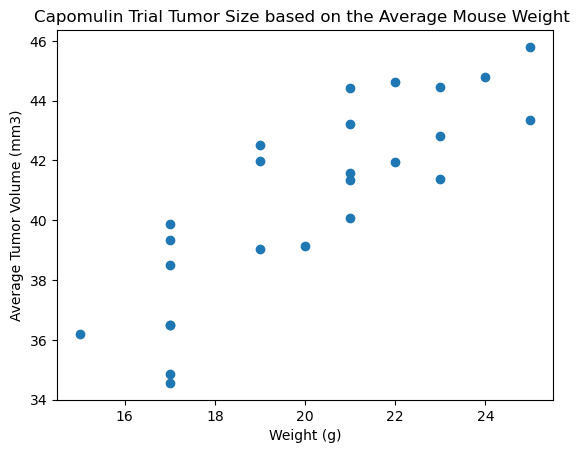

In [125]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
treatment_ave=treatment_table.groupby("Mouse ID").mean(numeric_only = True)
plt.scatter(treatment_ave["Weight (g)"], treatment_ave["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"Capomulin Trial Tumor Size based on the Average Mouse Weight ")
plt.show()

## Correlation and Regression

In [130]:
corr = round(st.pearsonr(treatment_ave["Weight (g)"], treatment_ave["Tumor Volume (mm3)"])[0], 2)
print(corr)

0.84


In [185]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr=round(st.pearsonr(treatment_ave["Weight (g)"], treatment_ave["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

# Creat variables for linear regression equation to print onto plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(treatment_ave["Weight (g)"],treatment_ave["Tumor Volume (mm3)"])
line_eq= " = " + str(round(slope,2)) + "(Weight) " + str(round(intercept,2)) + "(mm3)"
r_squarred = "R^2 = " + str(round(rvalue**2,2))



The correlation between mouse weight and the average tumor volume is 0.84


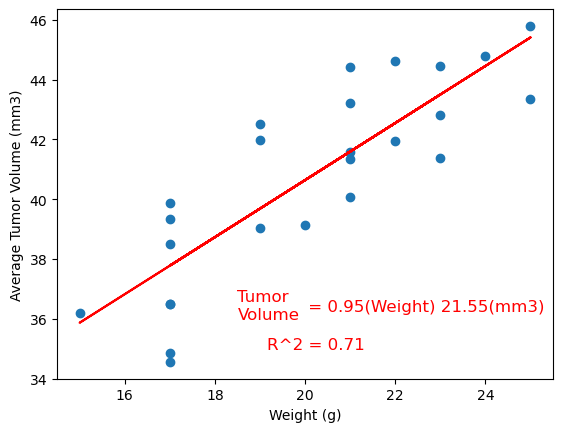

In [187]:
# Generate the scatter plot
model = st.linregress(treatment_ave["Weight (g)"],treatment_ave["Tumor Volume (mm3)"])
y_values = treatment_ave["Weight (g)"]*model[0] + model[1]
plt.scatter(treatment_ave["Weight (g)"], treatment_ave["Tumor Volume (mm3)"])
plt.plot(treatment_ave["Weight (g)"], y_values, color = "red")

# Formatting
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate("Tumor",(18.5,36.6),fontsize=12,color="red")
plt.annotate("Volume",(18.5,36),fontsize=12,color="red")
plt.annotate(line_eq, (19.95,36.25),fontsize=12,color="red")
plt.annotate(r_squarred,(19.15,35), fontsize=12,color="red")
plt.show()
